In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytensor.tensor as T
import seaborn as sns


In [14]:
def ddiffusion(rt,theta,delta,mu):
    #RT : reaction time
    #theta: threshold
    #mu: drift rate
    #delta: non-decision time
    first= 1/np.sqrt(2*np.pi)*(2*theta+mu*(rt-delta))
    second = (2*(rt-delta)**1.5)
    third = np.exp(-(2*theta-mu*(rt-delta))**2/(2*(rt-delta)))
    return first/second*third
def ddiffusion2(rt,theta,delta,mu):
    first_num = 1/np.sqrt(2*np.pi)*(2*theta+mu*(rt-delta))
    first_denum = 2*((rt-delta)**1.5)
    first_term = first_num/first_denum

    sec_num = -(2*theta-mu*(rt-delta))**2
    sec_denum = 2*(rt-delta)
    sec_term = np.exp(sec_num/sec_denum)
    return first_term*sec_term
def logdiffusion(rt,theta,delta,mu):
    first= np.log((2*theta+mu*(rt-delta))/(2*(rt-delta)**1.5)) 
    second = np.log(np.sqrt(2*np.pi)) 
    third= (2*theta-mu*(rt-delta))**2/(2*(rt-delta))
    return first-second-third
def rng_diffusion(theta,delta,mu,size):
    X = np.linspace(0,3,48000)
    dx =  X[1]-X[0]
    pdist = ddiffusion(X,theta,delta,mu)
    cdf = np.nancumsum(pdist)*dx
    cdf = cdf/cdf.max()
    randi = np.random.random_sample(size=size)
    idx = np.searchsorted(cdf,randi)
    return X[idx]

def rng_diffusion2(theta,delta,mu,size):
    X = np.linspace(0,3,48000)
    dx =  X[1]-X[0]
    pdist = ddiffusion2(X,theta,delta,mu)
    cdf = np.nancumsum(pdist)*dx
    cdf = cdf/cdf.max()
    randi = np.random.random_sample(size=size)
    idx = np.searchsorted(cdf,randi)
    return X[idx]

In [15]:

def ddiffusion2_T(rt,theta,delta,mu):
    first_num = 1/T.sqrt(2*T.pi)*(2*theta+mu*(rt-delta))
    first_denum = 2*T.power((rt-delta),1.5)
    first_term = first_num/first_denum

    sec_num = -T.power((2*theta-mu*(rt-delta)),1.5)
    sec_denum = 2*(rt-delta)
    sec_term = T.exp(sec_num/sec_denum)
    return first_term*sec_term
def logdiffusion_T(rt,theta,delta,mu):
    first= T.log((2*theta+mu*(rt-delta))/(2*T.power((rt-delta),1.5))) 
    second = T.log(T.sqrt(2*T.pi)) 
    third= (2*theta-mu*(rt-delta))**2/(2*(rt-delta))
    return first-second-third
def rng_diffusion_T(theta,delta,mu,size):
    X = np.linspace(0,3,48000)
    dx =  X[1]-X[0]
    pdist = ddiffusion(X,theta,delta,mu)
    cdf = np.nancumsum(pdist)*dx
    cdf = cdf/cdf.max()
    randi = np.random.random_sample(size=size)
    idx = T.searchsorted(cdf,randi)
    return X[idx]

def rng_diffusion2_T(theta,delta,mu,size):
    X = np.linspace(0,3,48000)
    dx =  X[1]-X[0]
    pdist = ddiffusion2(X,theta,delta,mu)
    cdf = np.nancumsum(pdist)*dx
    cdf = cdf/cdf.max()
    randi = np.random.random_sample(size=size)
    idx = T.searchsorted(cdf,randi)
    return X[idx]

In [ ]:
a = np.linspace(0.01,10,10000)
sim_vals = list()
sim_vals2 = list()
log_sim = list()
log_sim_2 = list()
rng_list = list()
rng_list2 = list()

theta = 1.2 # boundary
delta=0.1 #ndt
mu=1.5 #drift
for i in a:
    sim_vals.append(ddiffusion(i,theta,delta,mu))
    sim_vals2.append(ddiffusion2(i,theta,delta,mu))
    log_sim.append(logdiffusion(i,theta,delta,mu))
    log_sim_2.append(np.log(ddiffusion2(i,theta,delta,mu)))
rng_list.append(rng_diffusion(theta,delta,mu,10000))
rng_list2.append(rng_diffusion2(theta,delta,mu,10000))

plt.plot(a,sim_vals)
plt.plot(a,sim_vals2)

#plt.xlim([0,800])

#plt.plot(a,cdf)
#plt.hist(rng_list)
plt.figure()

sns.kdeplot(rng_list[0],color='k')
sns.kdeplot(rng_list2[0],color='yellow')
plt.xlim([0,10])
plt.figure()
plt.plot(a,np.nanlog(log_sim))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('rt')
ax1.set_ylabel('prob', color=color)
ax1.plot(a, sim_vals, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,0.004])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('count', color=color)  # we already handled the x-label with ax1
ax2.hist(np.array(rng_list[0]),bins=100, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('rt')
ax1.set_ylabel('prob', color=color)
ax1.plot(a, sim_vals2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,0.01])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('count', color=color)  # we already handled the x-label with ax1
ax2.hist(np.array(rng_list[0]),bins=100, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [14]:
import pytensor.tensor as T


In [18]:
import pandas as pd
import os
df = pd.read_csv(os.getcwd()+"/PipPopRobotsDF.csv")
df.groupby(["Cue"]).mean(["RT"]).reset_index()
df

,Unnamed: 0,Correct,RT,ID,Cue
0,0,True,1.296043,0,0
1,1,True,1.004838,0,0
2,2,True,0.994750,0,2
3,3,True,0.994516,0,1
4,4,True,1.005114,0,3
...,...,...,...,...,...
736,736,True,0.524834,18,3
737,737,True,0.616462,18,1
738,738,True,2.341574,18,2
739,739,True,4.015726,18,0


from itertools import product

subj = pd.factorize(df.ID)[1]
cue = pd.factorize(df.Cue)[1]
cue=np.sort(cue)
rts_nc = np.full((len(subj),10),np.nan)
rts_ac = np.full((len(subj),10),np.nan)
rts_hc = np.full((len(subj),10),np.nan)
rts_mc = np.full((len(subj),10),np.nan)

for iSub in subj: 
    for iCue in cue:
        tmp_df = df[(df.ID==iSub) & (df.Cue==iCue)]
        sz = len(tmp_df.RT)
        if iCue==0:
            rts_nc[iSub,:sz] = tmp_df.RT
        if iCue==0:
            rts_ac[iSub,:sz] = tmp_df.RT
        if iCue==0:
            rts_nc[iSub,:sz] = tmp_df.RT
        if iCue==0:
            rts_nc[iSub,:sz] = tmp_df.RT
nSubj,nCue,nStim = full_rts.shape
subjIdx, cueIdx, stimIdx = zip(*product(range(nSubj), range(nCue), range(nStim)))
rts_flat = full_rts.flatten()

In [19]:
from itertools import product

subj = pd.factorize(df.ID)[1]
cue = pd.factorize(df.Cue)[1]
cue=np.sort(cue)
#subj=[0,1,2]
full_rts = np.full((len(subj),len(cue),10),np.nan)
mean_rts = np.full((len(subj),len(cue)),np.nan)
min_rts = np.full((len(subj),len(cue)),np.nan)




for iSub in subj: 
    for iCue in cue:
        tmp_df = df[(df.ID==iSub) & (df.Cue==iCue)]
        sub_df = df[(df.ID==iSub) ]
        sz = len(tmp_df.RT)
        full_rts[iSub,iCue,:sz] = tmp_df.RT
        mean_rts[iSub,iCue] = np.mean(tmp_df.RT)
        min_rts[iSub,iCue] = np.min(sub_df.RT)-0.01
        
        if sz <10:
            mean_rt = np.mean(tmp_df.RT)
            full_rts[iSub,iCue,sz:] = mean_rt
            
        
nSubj,nCue = mean_rts.shape
subjIdx, cueIdx,stimIdx = zip(*product(range(nSubj), range(nCue),range(10)))
subjIdx = np.array(subjIdx)
cueIdx = np.array(cueIdx)

rts_flat = full_rts.flatten()


In [ ]:
nan_idx = np.isfinite(rts_flat)
rts_flat = rts_flat[nan_idx]
subjIdx = subjIdx[nan_idx]
cueIdx = cueIdx[nan_idx]
stimIdx = stimIdx[nan_idx]

In [22]:
dat = {'RT':rts_flat,'subjIdx':subjIdx,'cueIdx':cueIdx,'stimIdx':stimIdx}
data_df = pd.DataFrame(dat)


In [23]:
import pymc as pm
from pytensor.tensor import TensorVariable
from typing import Optional, Tuple
def Phi(x):
    # probit transform
    return 0.5 + 0.5 * pm.math.erf(x / pm.math.sqrt(2))
def logp(rt: TensorVariable, theta: TensorVariable, delta: TensorVariable, mu: TensorVariable) -> TensorVariable:
    return logdiffusion_T(rt,theta,delta,mu)
def random(theta: np.ndarray | float, delta: np.ndarray | float,mu: np.ndarray | float,rng: Optional[np.random.Generator] = None,size : Optional[Tuple[int]]=None) -> np.ndarray | float :
    return rng_diffusion2_T(theta,delta,mu,size)
        

In [ ]:
coords = {"subj":subj , "cue":cue,"stim":np.arange(10),"obs_id":np.arange(len(rts_flat))}
coords

C:\Users\borac\AppData\Local\Temp\ipykernel_3140\450900282.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(draws,bins=100)
C:\Users\borac\AppData\Local\Temp\ipykernel_3140\450900282.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(draws,bins=100)
C:\Users\borac\AppData\Local\Temp\ipykerne

<Axes: ylabel='Density'>

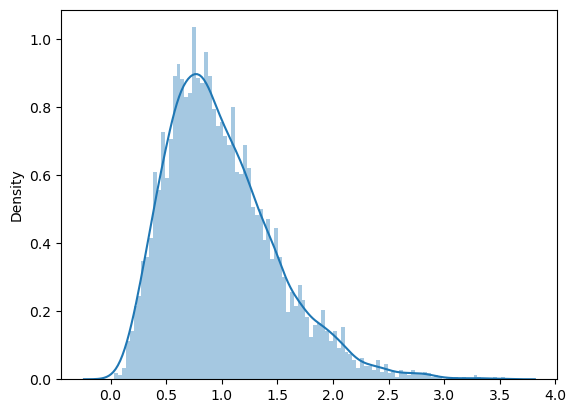

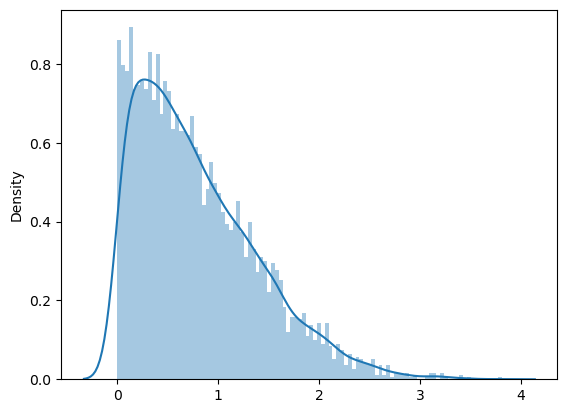

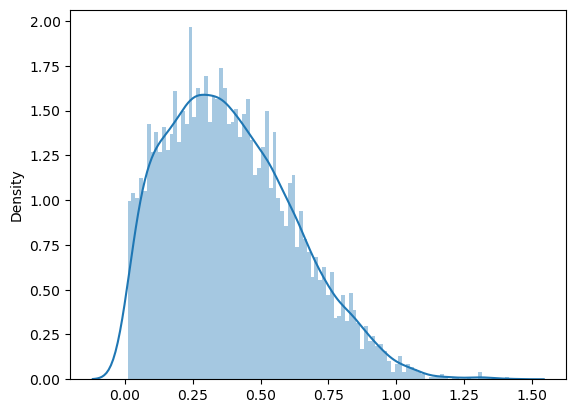

In [26]:
v = pm.Gamma.dist(mu=1,sigma=0.5)
draws = pm.draw(v,5000)
sns.distplot(draws,bins=100)
v = pm.HalfNormal.dist(sigma=1)
draws = pm.draw(v,5000)
plt.figure()
sns.distplot(draws,bins=100)
v = pm.TruncatedNormal.dist(mu=0.3,sigma=0.3,lower=0.01)
draws = pm.draw(v,5000)
plt.figure()
sns.distplot(draws,bins=100)
#plt.xlim([0,50])

In [ ]:
minRT = np.min(rts_flat)
RTbound = np.full((nSubj,nCue),0.1)
min_rts

C:\Users\borac\AppData\Local\Temp\ipykernel_3140\628326188.py:20: RuntimeWarning: invalid value encountered in scalar power
  first= np.log((2*theta+mu*(rt-delta))/(2*(rt-delta)**1.5))


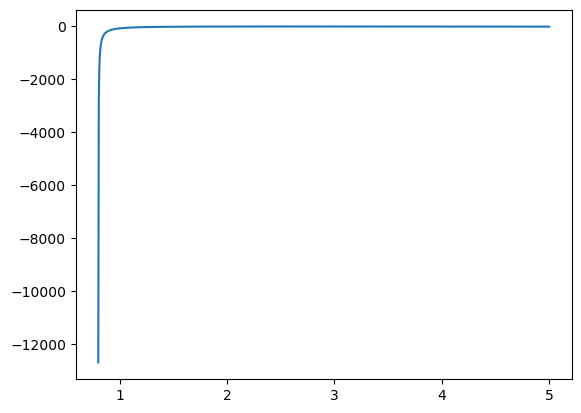

In [28]:
a = np.linspace(0.1,5,1000)
b=list()
for i in range(len(a)):
    b.append(logdiffusion(a[i],3.01,0.79997875,3.01))
plt.plot(a,b)

In [191]:
theta = 10
delta=0.2
mu=0.4
#x = rng_diffusion(theta,delta,mu,760)
#x[5]=np.nan

with pm.Model(coords=coords) as model:
    #data =pm.ConstantData("wiener_data",data_df,dims=("subj","cue","stim"))
    mu_v = pm.TruncatedNormal(name="mu_drift",mu=1,sigma=3,lower=0.01,dims="cue")
    sigma_v = pm.HalfNormal(name="sigma_drift",sigma=1,dims="cue")
    mu_a = pm.TruncatedNormal(name="mu_bound",mu=1,sigma=3,lower=0.01,dims="cue")
    sigma_a = pm.HalfNormal(name="sigma_bound",sigma=1,dims="cue")
    mu_t = pm.TruncatedNormal(name="mu_t",mu=0.3,sigma=0.3,lower=0.01,upper=minRT,dims="cue")
    sigma_t = pm.HalfNormal(name="sigma_ndt",sigma=1,dims="cue")

    
    #v_offset = pm.HalfNormal('drift_offset',sigma= 1,dims=["subj","cue"])
    v_offset = pm.Normal('drift_offset',mu=0,sigma= 1,dims=["subj","cue"])
    v = pm.Deterministic('drift', mu_v + sigma_v*v_offset)
    #a_offset = pm.HalfNormal('bound_offset',sigma= 1,dims=["subj","cue"])
    a_offset = pm.Normal('bound_offset',mu=0,sigma= 1,dims=["subj","cue"])
    a = pm.Deterministic('bound', mu_a + sigma_a*a_offset)
    #t_offset = pm.HalfNormal('ndt_offset',sigma= 1,dims=["subj","cue"])
    t_offset = pm.Normal('ndt_offset',mu=0,sigma= 1,dims=["subj","cue"])
    t = pm.Deterministic("ndt", Phi(mu_t + sigma_t*t_offset)*(min_rts-RTbound)+RTbound)
    # v = pm.TruncatedNormal('drift',mu=mu_v,sigma= sigma_v,lower=0.01,dims=["subj","cue"])
    # a = pm.TruncatedNormal('bound',mu=mu_a,sigma= sigma_a,lower=0.01,dims=["subj","cue"])
    # t = pm.TruncatedNormal('ndt',mu=mu_t,sigma= sigma_t,lower=0.1,upper=minRT,dims=["subj","cue"])
    
    
    pm.CustomDist("wiener", a[subjIdx,cueIdx],t[subjIdx,cueIdx],v[subjIdx,cueIdx], \
                  logp=logp, \
                  random=random,\
                  observed=rts_flat
                  
                 )
    results = pm.sample(10000,tune=2000,chains=4,cores=4, target_accept=0.99, initvals={'mu_drift':np.full((nCue),2), 
    
                                                                 'mu_bound':np.full((nCue),1),

                                                                 'mu_t':np.full((nCue),0.2)})




Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_drift, sigma_drift, mu_bound, sigma_bound, mu_t, sigma_ndt, drift_offset, bound_offset, ndt_offset]


Sampling 4 chains for 2_000 tune and 10_000 draw iterations (8_000 + 40_000 draws total) took 4488 seconds.
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.


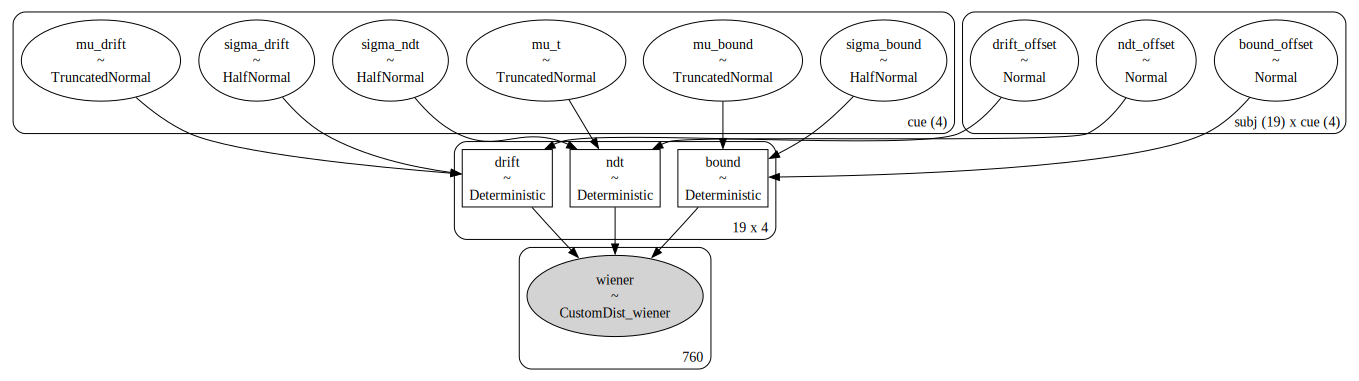

In [157]:
pm.model_to_graphviz(model)

In [192]:
with model:
    pm.compute_log_likelihood(results)

In [193]:
results.to_netcdf("WienerVAT_HierNAT.nc")

'WienerVAT_HierNAT.nc'

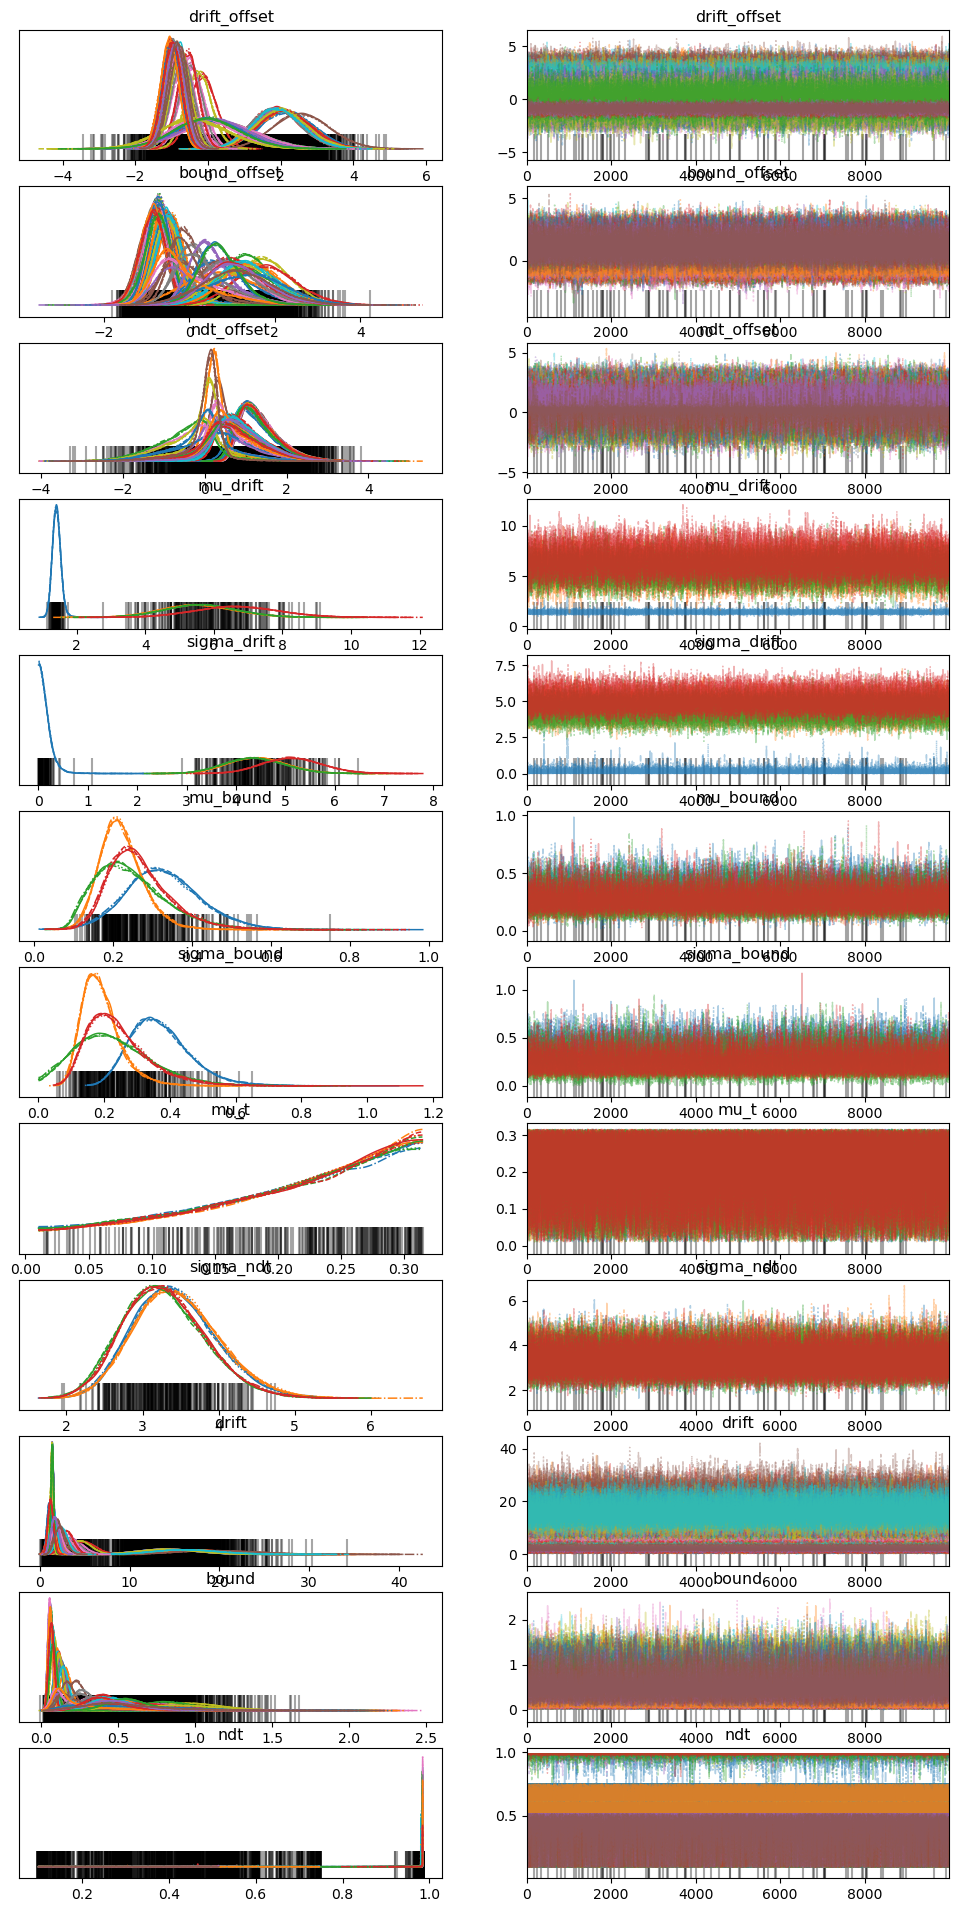

In [233]:
import arviz as az
az.plot_trace(results);


In [194]:
summary=az.summary(results)
pd.set_option('display.max_rows', 500)
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"drift_offset[0, 0]",0.110,0.959,-1.707,1.885,0.004,0.006,71305.0,28000.0,1.0
"drift_offset[0, 1]",2.047,0.701,0.752,3.378,0.003,0.002,56637.0,29818.0,1.0
"drift_offset[0, 2]",1.995,0.698,0.686,3.321,0.003,0.002,55057.0,29747.0,1.0
"drift_offset[0, 3]",1.871,0.671,0.621,3.132,0.003,0.002,54695.0,31608.0,1.0
"drift_offset[1, 0]",-0.054,0.947,-1.848,1.716,0.004,0.005,69045.0,29547.0,1.0
"drift_offset[1, 1]",-0.922,0.266,-1.433,-0.432,0.003,0.002,9522.0,16235.0,1.0
"drift_offset[1, 2]",-0.433,0.340,-1.075,0.205,0.003,0.002,14691.0,23733.0,1.0
"drift_offset[1, 3]",-0.779,0.283,-1.318,-0.255,0.003,0.002,11380.0,20162.0,1.0
"drift_offset[2, 0]",-0.358,0.951,-2.124,1.471,0.004,0.005,56921.0,29559.0,1.0
"drift_offset[2, 1]",2.040,0.697,0.728,3.348,0.003,0.002,54528.0,28895.0,1.0


In [220]:
min_rts

array([[0.98449104, 0.98449104, 0.98449104, 0.98449104],
       [0.98471311, 0.98471311, 0.98471311, 0.98471311],
       [0.98088368, 0.98088368, 0.98088368, 0.98088368],
       [0.98390586, 0.98390586, 0.98390586, 0.98390586],
       [0.98024959, 0.98024959, 0.98024959, 0.98024959],
       [0.98446447, 0.98446447, 0.98446447, 0.98446447],
       [0.9845298 , 0.9845298 , 0.9845298 , 0.9845298 ],
       [0.98412   , 0.98412   , 0.98412   , 0.98412   ],
       [0.98299738, 0.98299738, 0.98299738, 0.98299738],
       [0.98441494, 0.98441494, 0.98441494, 0.98441494],
       [0.98441458, 0.98441458, 0.98441458, 0.98441458],
       [0.55773428, 0.55773428, 0.55773428, 0.55773428],
       [0.7472743 , 0.7472743 , 0.7472743 , 0.7472743 ],
       [0.46702219, 0.46702219, 0.46702219, 0.46702219],
       [0.45771388, 0.45771388, 0.45771388, 0.45771388],
       [0.30522141, 0.30522141, 0.30522141, 0.30522141],
       [0.55614693, 0.55614693, 0.55614693, 0.55614693],
       [0.60609467, 0.60609467,

In [195]:
results

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [196]:
np.sum(summary.r_hat>1.0)

0

In [197]:
rts_flat_1 = rts_flat[subjIdx==0]
cue_1 = cueIdx[(subjIdx==0)]
rts_flat_1
coords_1 = {'cue':[0,1,2,3]}

In [198]:
results.posterior

<xarray.Dataset>
Dimensions:       (chain: 4, draw: 10000, subj: 19, cue: 4, drift_dim_0: 19,
                   drift_dim_1: 4, bound_dim_0: 19, bound_dim_1: 4,
                   ndt_dim_0: 19, ndt_dim_1: 4)
Coordinates:
  * chain         (chain) int32 0 1 2 3
  * draw          (draw) int32 0 1 2 3 4 5 6 ... 9994 9995 9996 9997 9998 9999
  * subj          (subj) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
  * cue           (cue) int64 0 1 2 3
  * drift_dim_0   (drift_dim_0) int32 0 1 2 3 4 5 6 7 ... 12 13 14 15 16 17 18
  * drift_dim_1   (drift_dim_1) int32 0 1 2 3
  * bound_dim_0   (bound_dim_0) int32 0 1 2 3 4 5 6 7 ... 12 13 14 15 16 17 18
  * bound_dim_1   (bound_dim_1) int32 0 1 2 3
  * ndt_dim_0     (ndt_dim_0) int32 0 1 2 3 4 5 6 7 ... 11 12 13 14 15 16 17 18
  * ndt_dim_1     (ndt_dim_1) int32 0 1 2 3
Data variables:
    drift_offset  (chain, draw, subj, cue) float64 0.2224 1.397 ... -0.912
    bound_offset  (chain, draw, subj, cue) float64 -0.8154 -0.7147 ... 1.726
    ndt_offset    (chain, draw, subj, cue) float64 1.506 1.309 ... 0.3058
    mu_drift      (chain, draw, cue) float64 1.456 6.405 5.151 ... 4.808 6.6
    sigma_drift   (chain, draw, cue) float64 0.1656 4.533 4.195 ... 3.395 5.215
    mu_bound      (chain, draw, cue) float64 0.3731 0.2254 ... 0.3299 0.1727
    sigma_bound   (chain, draw, cue) float64 0.3965 0.2103 ... 0.3907 0.09506
    mu_t          (chain, draw, cue) float64 0.06137 0.3093 ... 0.2912 0.3108
    sigma_ndt     (chain, draw, cue) float64 3.242 3.246 2.799 ... 2.526 2.848
    drift         (chain, draw, drift_dim_0, drift_dim_1) float64 1.493 ... 1...
    bound         (chain, draw, bound_dim_0, bound_dim_1) float64 0.04973 ......
    ndt           (chain, draw, ndt_dim_0, ndt_dim_1) float64 0.9845 ... 0.4656
Attributes:
    created_at:                 2023-12-17T18:44:28.932513
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.9.2
    sampling_time:              4488.29150724411
    tuning_steps:               2000

In [199]:
results.posterior['drift'][0,:,2]

<xarray.DataArray 'drift' (draw: 10000, drift_dim_1: 4)>
array([[ 1.42415508, 13.99407073, 14.21547677, 17.87096456],
       [ 1.15348454, 17.14559343, 12.95103936, 26.45104646],
       [ 1.48604266,  9.11026588, 10.31891838, 11.56585913],
       ...,
       [ 1.66826378, 17.62234441, 14.87867505, 18.29804444],
       [ 0.95153567,  8.94486399, 14.18298659, 16.69572251],
       [ 1.01876208, 19.01690083, 15.78048186, 21.14980032]])
Coordinates:
    chain        int32 0
  * draw         (draw) int32 0 1 2 3 4 5 6 ... 9994 9995 9996 9997 9998 9999
    drift_dim_0  int32 2
  * drift_dim_1  (drift_dim_1) int32 0 1 2 3

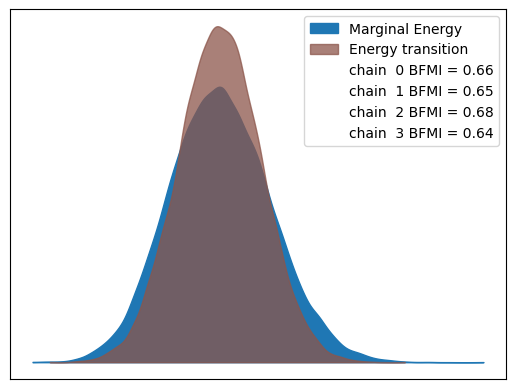

In [200]:
az.plot_energy(results);

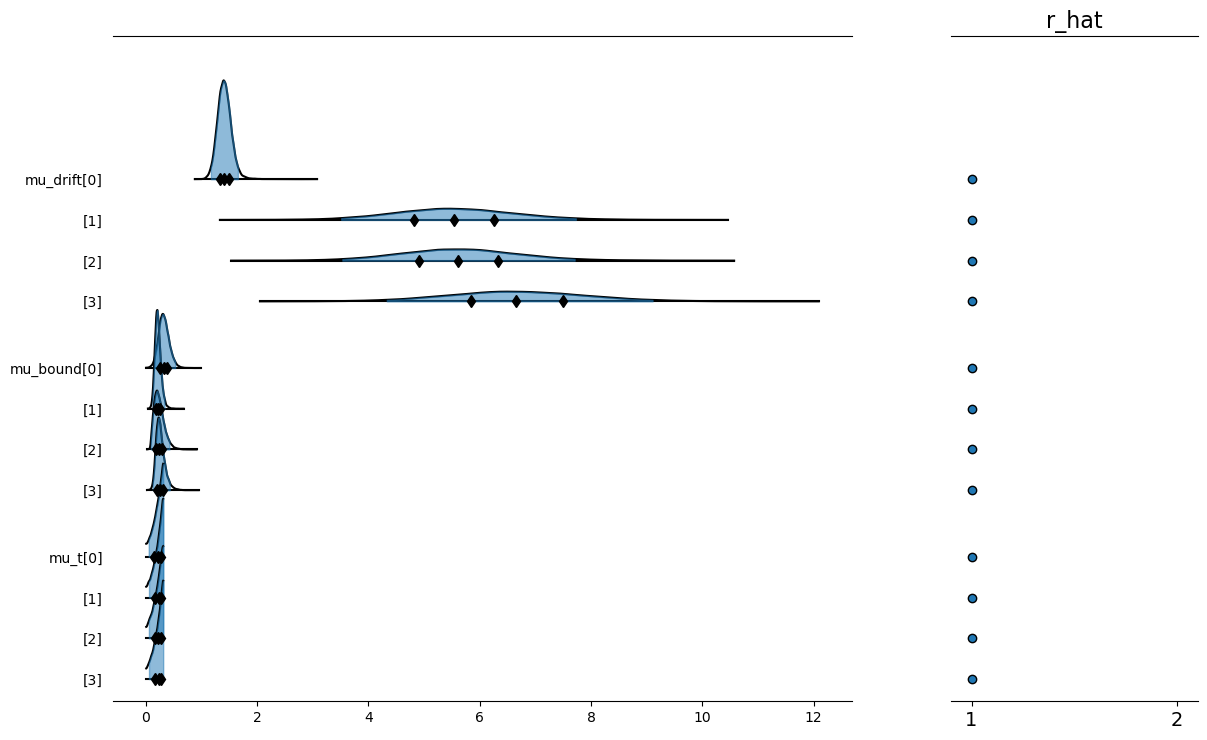

In [201]:
coords = {"subj":subj , "cue":cue}

#labeller = azl.MapLabeller(var_name_map={"theta": r"$\theta$"})
az.plot_forest(results, combined=True, hdi_prob=0.95, r_hat=True,var_names=["mu_drift","mu_bound","mu_t"],
              kind='ridgeplot',ridgeplot_quantiles=[.25, .5, .75],ridgeplot_truncate=False,
              ridgeplot_alpha=0.5,coords=coords);

In [1]:
import arviz as az
import os
results = az.from_netcdf(os.getcwd()+"/WienerVAT_HierNAT.nc")


In [4]:
bound=results.posterior['mu_bound']
bound = np.array(bound).reshape((40000,4))
drift=results.posterior['mu_drift']
drift = np.array(drift).reshape((40000,4))
ndt=results.posterior['mu_t']
ndt = np.array(ndt).reshape((40000,4))
col_pal = ['#C3C8CD','#A8ADB4','#868F98','#606A74','#414B56','#212930']

Text(-0.5, 0.42, 'B')

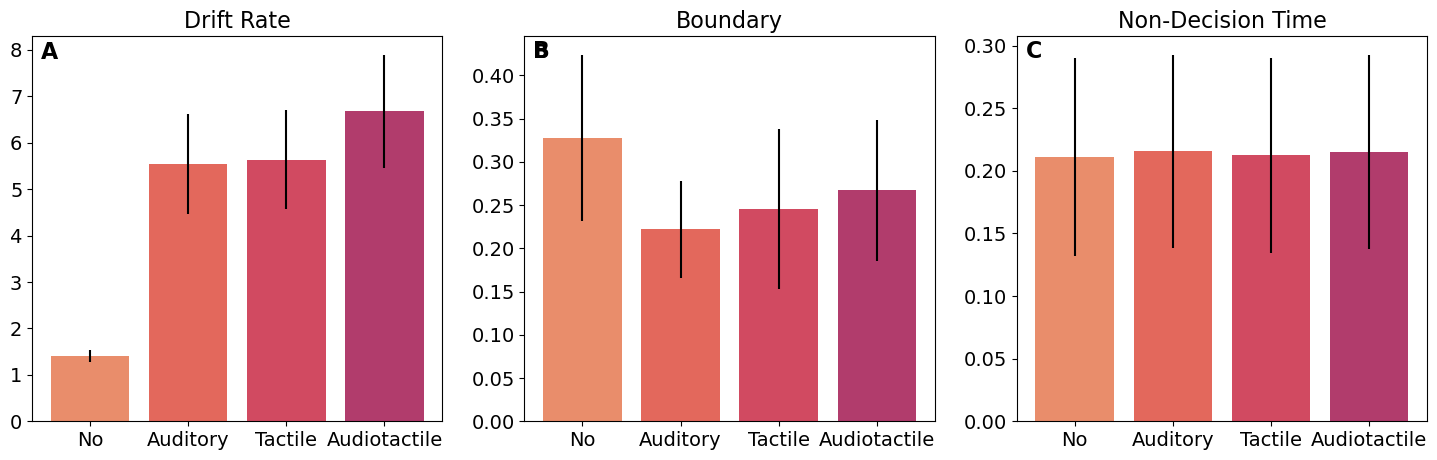

In [20]:
from scipy.stats import sem
import seaborn as sns

f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(18,5))
means= [np.mean(drift[:,0]),np.mean(drift[:,1]),np.mean(drift[:,2]),np.mean(drift[:,3])]
sems =[np.std(drift[:,0]),np.std(drift[:,1]),np.std(drift[:,2]),np.std(drift[:,3])]
ax1.bar([0,1,2,3],means,color=sns.color_palette("flare"))
ax1.errorbar([0,1,2,3],means,yerr=sems,color='k',fmt='None')
ax1.set_xticks([0,1,2,3],["No","Auditory","Tactile","Audiotactile"],fontsize=16)
ax1.set_title("Drift Rate",fontsize=16)
ax1.text(-0.5,7.8,'A',fontsize=16,weight="bold")
ax1.tick_params(axis='both', which='major', labelsize=14)


means= [np.mean(bound[:,0]),np.mean(bound[:,1]),np.mean(bound[:,2]),np.mean(bound[:,3])]
sems =[np.std(bound[:,0]),np.std(bound[:,1]),np.std(bound[:,2]),np.std(bound[:,3])]
ax2.bar([0,1,2,3],means,color=sns.color_palette("flare"))
ax2.errorbar([0,1,2,3],means,yerr=sems,color='k',fmt='None')
ax2.set_xticks([0,1,2,3],["No","Auditory","Tactile","Audiotactile"],fontsize=16)
ax2.set_title("Boundary",fontsize=16)
ax2.text(-0.5,0.42,'B',fontsize=16,weight="bold")
ax2.tick_params(axis='both', which='major', labelsize=14)


means= [np.mean(ndt[:,0]),np.mean(ndt[:,1]),np.mean(ndt[:,2]),np.mean(ndt[:,3])]
sems =[np.std(ndt[:,0]),np.std(ndt[:,1]),np.std(ndt[:,2]),np.std(ndt[:,3])]
ax3.bar([0,1,2,3],means,color=sns.color_palette("flare"))
ax3.errorbar([0,1,2,3],means,yerr=sems,color='k',fmt='None')
ax3.set_xticks([0,1,2,3],["No","Auditory","Tactile","Audiotactile"],fontsize=16)
ax3.set_title("Non-Decision Time",fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.text(-0.5,0.29,'C',fontsize=16,weight="bold")

ax2.text(-0.5,0.42,'B',fontsize=14,weight="bold")


Text(0.5, 1.0, 'Drift Rate')

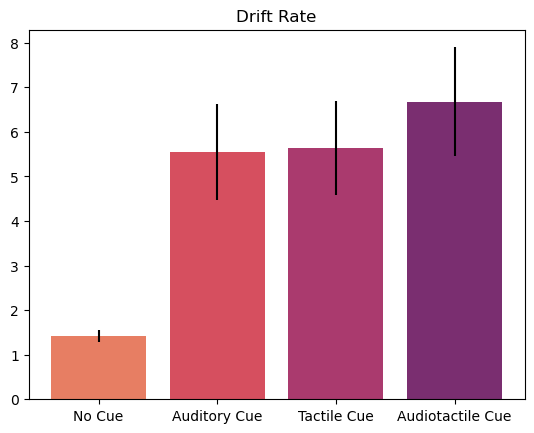

In [6]:
from scipy.stats import sem
means= [np.mean(drift[:,0]),np.mean(drift[:,1]),np.mean(drift[:,2]),np.mean(drift[:,3])]
sems =[np.std(drift[:,0]),np.std(drift[:,1]),np.std(drift[:,2]),np.std(drift[:,3])]
plt.bar([0,1,2,3],means,color=sns.color_palette("flare",4))
plt.errorbar([0,1,2,3],means,yerr=sems,color='k',fmt='None')
plt.xticks([0,1,2,3],["No Cue","Auditory Cue","Tactile Cue","Audiotactile Cue"])
plt.title("Drift Rate")

Text(0.5, 1.0, 'Non-Decision Time')

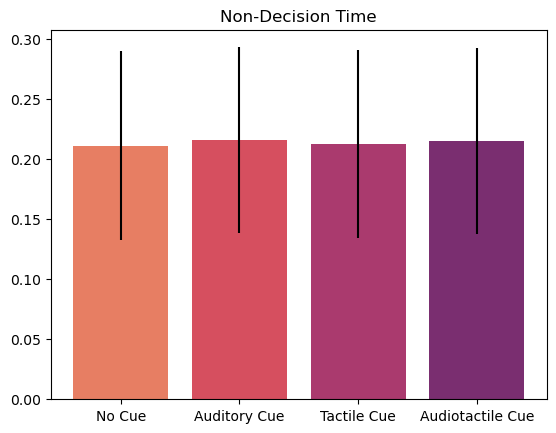

In [7]:
from scipy.stats import sem
means= [np.mean(ndt[:,0]),np.mean(ndt[:,1]),np.mean(ndt[:,2]),np.mean(ndt[:,3])]
sems =[np.std(ndt[:,0]),np.std(ndt[:,1]),np.std(ndt[:,2]),np.std(ndt[:,3])]
plt.bar([0,1,2,3],means,color=sns.color_palette("flare",4))
plt.errorbar([0,1,2,3],means,yerr=sems,color='k',fmt='None')
plt.xticks([0,1,2,3],["No Cue","Auditory Cue","Tactile Cue","Audiotactile Cue"])
plt.title("Non-Decision Time")

In [11]:
print(np.sum(bound[:,0] < bound[:,1])/40000)
print(np.sum(bound[:,0] < bound[:,2])/40000)
print(np.sum(bound[:,0] < bound[:,3])/40000)
print(np.sum(bound[:,1] < bound[:,2])/40000)
print(np.sum(bound[:,1] < bound[:,3])/40000)
print(np.sum(bound[:,2] < bound[:,3])/40000)

0.16285
0.25475
0.3019
0.55915
0.67295
0.585075


In [10]:
print(np.sum(drift[:,0] < drift[:,1])/40000)
print(np.sum(drift[:,0] < drift[:,2])/40000)
print(np.sum(drift[:,0] < drift[:,3])/40000)
print(np.sum(drift[:,1] < drift[:,2])/40000)
print(np.sum(drift[:,1] < drift[:,3])/40000)
print(np.sum(drift[:,2] < drift[:,3])/40000)

0.99995
1.0
1.0
0.52235
0.759125
0.738625


In [12]:
print(np.sum(ndt[:,0] < ndt[:,1])/40000)
print(np.sum(ndt[:,0] < ndt[:,2])/40000)
print(np.sum(ndt[:,0] < ndt[:,3])/40000)
print(np.sum(ndt[:,1] < ndt[:,2])/40000)
print(np.sum(ndt[:,1] < ndt[:,3])/40000)
print(np.sum(ndt[:,2] < ndt[:,3])/40000)

0.514425
0.50265
0.5132
0.48845
0.497475
0.509025


In [231]:
az.hdi(drift[:,3]-drift[:,0],0.95)

array([2.89987905, 7.71374223])

<Axes: ylabel='Density'>

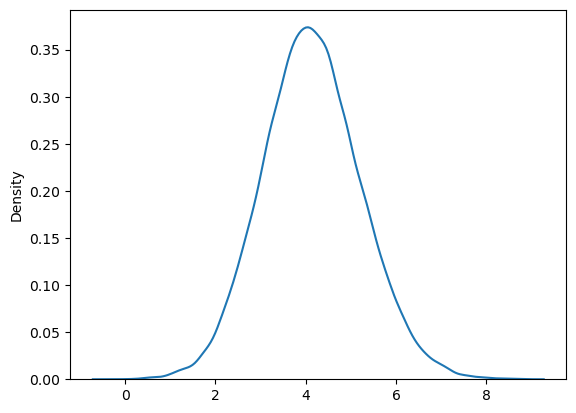

In [232]:
sns.kdeplot(drift[:,1]-drift[:,0])

In [241]:
tmp = np.array(results.posterior['drift'])
mean_drifts= np.mean(tmp,axis=(0,1))
tmp = np.array(results.posterior['bound'])
mean_bounds= np.mean(tmp,axis=(0,1))
tmp = np.array(results.posterior['ndt'])
mean_ndt= np.mean(tmp,axis=(0,1))

In [287]:
pred_rts = np.full((19,4),np.nan)
for i in range(19):
    for j in range(4):
        all_preds = rng_diffusion2(mean_bounds[i,j],mean_ndt[i,j],mean_drifts[i,j],1000)
        pred_rts[i,j] = np.nanmean(all_preds)
        

C:\Users\Bora Celebi\AppData\Local\Temp\ipykernel_26240\628326188.py:12: RuntimeWarning: invalid value encountered in power
  first_denum = 2*((rt-delta)**1.5)
C:\Users\Bora Celebi\AppData\Local\Temp\ipykernel_26240\628326188.py:17: RuntimeWarning: overflow encountered in exp
  sec_term = np.exp(sec_num/sec_denum)


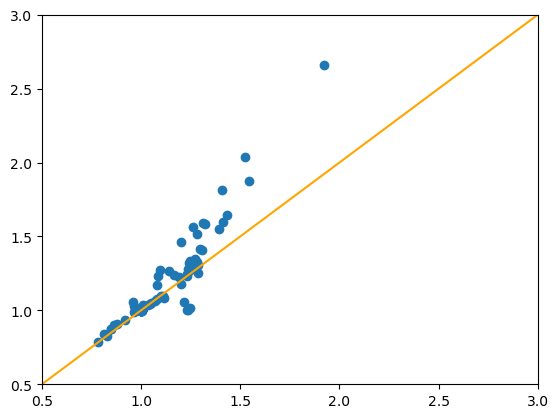

In [288]:
plt.scatter(pred_rts.flatten(),mean_rts.flatten())
plt.xlim([0.5,3])
plt.ylim([0.5,3])
plt.plot([0.5,3],[0.5,3],color='orange')

In [289]:
from scipy import stats
sanity = stats.pearsonr(pred_rts.flatten(),mean_rts.flatten())
sanity[0]**2

0.8568660795363389